In [50]:
import pandas as pd

data = pd.read_csv('film.csv')

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

vectorizer = TfidfVectorizer()

X = data['review']
X = vectorizer.fit_transform(X)

y = data['sentiment']
y.loc[y == 'Negative'] = 0
y.loc[y == 'Positive'] = 1

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [56]:
from sklearn import preprocessing

X_train = preprocessing.scale(X_train, with_mean=False)
X_test = preprocessing.scale(X_test, with_mean=False)

# 0.773
# wth kbest 0.8886
# with scale, normalize, kbest 0.892

In [5]:
from sklearn import preprocessing

X_train = preprocessing.normalize(X_train)
X_test = preprocessing.normalize(X_test)

# 0.86

In [14]:
from sklearn import preprocessing


binarizer = preprocessing.Binarizer().fit(X)

X_train = binarizer.transform(X_train)
X_test = binarizer.transform(X_test)

# 0.858

In [57]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

k_array = [7000, 10000, 20000, 25000, 30000, 40000, 50000, 60000]
k_accuracy = [0.8796, 0.8818, 0.8808,0.8806,0.8808,0.8798,0.8764,0.8730]

i=1
print(k_array[i])
sel = SelectKBest(chi2, k_array[i])

sel.fit(X, y)
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

sel.scores_

# 0.8818 k=10 000
# 0.8808 k=20 000
# 0.8808 k=30 000
# 0.8798 k=40 000
# 0.8764 k=50 000
# 0.8730 k=60 000
# 0.8806 k= 25000

# with scale 

10000


array([0.59033287, 0.8545268 , 0.27658526, ..., 0.07016974, 0.15455571,
       0.24343195])

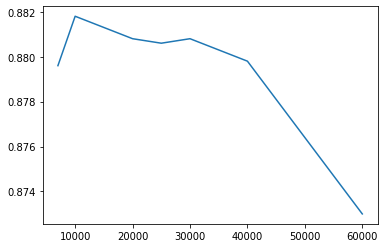

In [58]:
import matplotlib.pyplot as plt

plt.plot(k_array, k_accuracy)
plt.show()

In [24]:
from sklearn.feature_selection import SelectFromModel
from sklearn.naive_bayes import MultinomialNB

m = SelectFromModel(MultinomialNB())
m.fit(X_train, y_train)
print(X_train.shape)
X_train = m.transform(X_train)
X_test = m.transform(X_test)

X_train.shape


# 0.678

(20000, 74849)


(20000, 45293)

In [61]:
from sklearn.naive_bayes import MultinomialNB

# MultinomialNB - 0.86
# KNeighborsClassifier - 0.76
# DecisionTreeClassifier - 0.68
# RandomForestClassifier - 0.50
# AdaBoostClassifier - 0.7966
# QuadraticDiscriminantAnalysis - memory error
# GaussianNB - memory error

clf = MultinomialNB()
clf.fit(X_train, y_train)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [66]:
from sklearn.metrics import accuracy_score

predicted = clf.predict(X_test)

#accuracy - 0.86
#with feature selection accuracy - 0.69
accuracy_score(y_test, )

0.8886

In [69]:
predicted

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [85]:
for x in range(0, 1000):
    print('For values: \n', X_test[x], '\n we have ',predicted[x])

For values: 
   (0, 9748)	0.9416623736757157
  (0, 9736)	1.1593352474280103
  (0, 9731)	1.0157436877797954
  (0, 9673)	70.71775024730361
  (0, 9652)	16.047556415512
  (0, 9535)	3.931194420038503
  (0, 9513)	0.935328864934636
  (0, 9437)	4.580621876192466
  (0, 9420)	1.2738723185599385
  (0, 9029)	1.0378272093208445
  (0, 8972)	7.634055807607895
  (0, 8948)	0.4154471064601577
  (0, 8927)	1.901452326298172
  (0, 8913)	0.8900916820137577
  (0, 8649)	52.74562119602689
  (0, 8273)	1.022703913646346
  (0, 8249)	5.193547373086934
  (0, 8248)	6.507531085441376
  (0, 7848)	7.818348209790384
  (0, 7840)	1.119330508744341
  (0, 7751)	1.8574080441313379
  (0, 7750)	1.705292339407434
  (0, 7222)	70.7177502473036
  (0, 6367)	1.058874093858448
  (0, 6366)	13.36660294879313
  :	:
  (0, 3269)	0.49191371108411236
  (0, 3170)	12.111925254986557
  (0, 3147)	2.0245859851207504
  (0, 3132)	14.666761659784658
  (0, 3116)	2.6257087195907487
  (0, 2189)	2.6213437068067553
  (0, 2145)	30.440961078687607
  (0, 2

   (0, 9916)	2.513681650808663
  (0, 9915)	3.8476575282706027
  (0, 9855)	1.3753442367271917
  (0, 9750)	3.076248364136272
  (0, 9736)	2.915654460912329
  (0, 9731)	1.2772654074776588
  (0, 9722)	1.4412733819620058
  (0, 9715)	1.5961460912810008
  (0, 9676)	2.063825768294526
  (0, 9664)	3.2011760145267196
  (0, 9662)	4.225644169802992
  (0, 9256)	2.0764859216371527
  (0, 9062)	1.896142258651126
  (0, 9029)	1.30503473401054
  (0, 8948)	1.5672346009201639
  (0, 8932)	2.89958903651517
  (0, 8927)	1.1955079364840167
  (0, 8921)	1.931539683807852
  (0, 8913)	1.1192620033945448
  (0, 8860)	4.3876852342594415
  (0, 8836)	9.55211394967568
  (0, 8577)	5.570824241730531
  (0, 8507)	4.644280784732935
  (0, 8286)	4.44467950953593
  (0, 8273)	1.2860176703118078
  :	:
  (0, 3147)	5.0917050716035
  (0, 3013)	18.719127363188356
  (0, 3008)	1.9684957488123693
  (0, 2937)	6.337096707869862
  (0, 2913)	3.080676641291261
  (0, 2883)	15.114856108902067
  (0, 2442)	4.632505723251604
  (0, 2388)	2.0025962390

   (0, 9940)	3.033996674495555
  (0, 9876)	4.512708049639627
  (0, 9855)	4.652694016434828
  (0, 9853)	2.8846220152735067
  (0, 9722)	1.6252425783619897
  (0, 9715)	1.7998837842301392
  (0, 9696)	6.214715308739386
  (0, 9662)	2.9781376453811315
  (0, 9642)	5.362527401676263
  (0, 9623)	11.089725212192693
  (0, 9549)	22.26683142359258
  (0, 9488)	2.415987665827159
  (0, 9485)	28.935520873420373
  (0, 9256)	2.341535877544503
  (0, 9234)	5.862030477840665
  (0, 9148)	21.083055550065925
  (0, 9091)	5.285103747883466
  (0, 9029)	2.452689918165662
  (0, 9006)	3.1862032284163453
  (0, 8970)	2.8544817641838605
  (0, 8948)	1.7672819296989957
  (0, 8913)	3.786385609473866
  (0, 8701)	3.623956865048401
  (0, 8318)	17.233828490501683
  (0, 8277)	4.329251351406601
  :	:
  (0, 4597)	1.0025757200336538
  (0, 4408)	1.244720314309815
  (0, 4348)	1.3604738016212607
  (0, 4237)	9.552410134392938
  (0, 4151)	2.1217169059238112
  (0, 4036)	0.89496961969594
  (0, 4025)	4.158107885466306
  (0, 4002)	1.549855

   (0, 9851)	5.124923524277049
  (0, 9736)	2.040399895593016
  (0, 9676)	5.777131602669631
  (0, 9662)	1.478570941527374
  (0, 9641)	3.663975795864538
  (0, 9141)	9.519733548443735
  (0, 9029)	1.8265489074361423
  (0, 8948)	3.6558805338072125
  (0, 8932)	1.3527714495855014
  (0, 8926)	2.7834804289100474
  (0, 8913)	3.1330764402759304
  (0, 8909)	4.736546204667611
  (0, 8889)	4.706698210472598
  (0, 8601)	5.154193238619003
  (0, 8588)	15.77253008937606
  (0, 8530)	7.838217589584457
  (0, 8277)	5.373412858104082
  (0, 8273)	1.7999323002177157
  (0, 8243)	2.97365506568923
  (0, 8032)	4.68313268094774
  (0, 8010)	12.698309022905194
  (0, 7452)	24.546638713665207
  (0, 7312)	4.4426911962395055
  (0, 7202)	1.815306101040224
  (0, 7199)	7.340875132603307
  :	:
  (0, 6692)	6.027271929588033
  (0, 6367)	5.590772631164444
  (0, 6311)	1.2846192047067855
  (0, 6270)	0.5880945066490179
  (0, 6183)	15.56746241241346
  (0, 5936)	0.7039111239260905
  (0, 5625)	2.1032025964130208
  (0, 5427)	3.90448058

For values: 
   (0, 9736)	1.563901549417016
  (0, 9664)	3.4340997509755744
  (0, 9420)	1.7184079386657676
  (0, 9250)	24.037553246212727
  (0, 9213)	8.270927542101946
  (0, 9210)	4.196278483912733
  (0, 9029)	1.8666554352703653
  (0, 8955)	2.834399640390788
  (0, 8948)	2.2416928146893125
  (0, 8535)	1.4758987230754073
  (0, 8286)	4.768082956888022
  (0, 7962)	1.1533283827341294
  (0, 7294)	7.659882477934584
  (0, 6847)	7.736635688919415
  (0, 6840)	11.662856882142338
  (0, 6821)	3.7060101028760153
  (0, 6753)	3.895599763985761
  (0, 6612)	3.212486775682128
  (0, 6367)	1.4283830666725195
  (0, 6315)	1.686811392933821
  (0, 6311)	1.9692394309478258
  (0, 6271)	2.4030199792835574
  (0, 6270)	0.9015114264007835
  (0, 6202)	0.9758575178267893
  (0, 5936)	0.5395254625025058
  :	:
  (0, 4597)	0.9537810931632998
  (0, 4531)	5.8479117345839615
  (0, 4408)	1.776211030761543
  (0, 4348)	1.2942605369366011
  (0, 4121)	15.950859881462808
  (0, 4098)	7.956532034657204
  (0, 4002)	1.4744247755061766


   (0, 9825)	8.41901395694087
  (0, 9748)	2.8461715800878515
  (0, 9039)	8.811297922578083
  (0, 8955)	6.350772777878927
  (0, 8948)	2.5113751605494916
  (0, 8932)	2.32318629190244
  (0, 8535)	3.3069075016257288
  (0, 7202)	3.1175216263144256
  (0, 6707)	21.051326796038023
  (0, 6315)	3.7794796905150503
  (0, 6270)	3.029897836642153
  (0, 6004)	6.63702492561306
  (0, 5936)	1.2088639764860547
  (0, 5679)	10.804538588082531
  (0, 5625)	3.6119415756279425
  (0, 5384)	4.226295760568463
  (0, 5205)	28.206869131542504
  (0, 5151)	4.833881203428163
  (0, 4408)	1.326596351149859
  (0, 4025)	2.215811329312841
  (0, 3218)	7.550928294484412
  (0, 3065)	70.7177502473036
  (0, 3006)	3.620316616994861
  (0, 2910)	8.908643297496713
  (0, 1959)	4.374651927731457
  (0, 839)	5.543972317238793
  (0, 794)	2.460463511809595
  (0, 375)	0.963120450549606
  (0, 32)	40.86279781773822 
 we have  1
For values: 
   (0, 9855)	0.8106352330915011
  (0, 9836)	4.6984792191986
  (0, 9826)	2.609798036499313
  (0, 9774)	

In [89]:
for x in predicted:
    print(x)

1
1
0
1
1
0
0
0
0
0
0
0
1
0
0
1
1
0
0
1
1
0
0
1
1
0
0
1
0
0
0
1
0
0
1
0
0
1
0
0
0
0
1
0
0
0
1
1
1
1
1
1
1
0
0
1
0
1
1
1
0
0
0
0
0
0
0
0
0
1
0
0
1
1
0
0
1
0
0
0
0
0
0
0
1
0
1
0
0
1
0
1
0
0
1
1
1
1
0
1
1
0
0
1
0
1
0
0
0
0
0
0
0
0
0
1
0
1
0
1
1
0
1
1
0
1
0
0
0
1
0
0
0
0
1
0
0
0
0
1
0
1
1
1
0
1
1
0
0
0
1
1
0
0
0
1
0
1
0
0
0
0
0
1
1
1
1
0
1
0
1
1
0
1
0
0
0
0
0
0
0
1
1
1
1
0
0
1
0
0
1
0
1
0
1
1
0
0
1
1
1
0
0
1
0
0
0
0
0
1
1
1
1
1
0
1
1
1
1
1
1
1
0
0
1
0
1
0
1
0
1
0
1
0
1
1
0
1
0
1
0
0
0
1
1
0
0
0
0
1
0
0
1
1
0
1
0
0
0
1
1
1
1
0
0
0
0
1
1
1
1
0
0
1
1
0
0
1
0
0
0
0
0
0
1
1
0
1
0
1
1
1
0
1
1
0
0
1
1
0
1
1
0
0
0
1
1
0
1
0
0
0
0
1
1
1
0
1
1
0
1
0
0
1
1
1
0
1
0
1
1
0
0
1
0
1
1
1
0
0
1
1
1
1
1
1
0
1
1
0
1
0
1
1
1
1
1
0
0
1
0
1
0
1
0
1
1
1
0
0
1
1
1
0
0
1
0
0
1
1
1
0
0
1
1
1
0
0
1
0
1
1
1
1
1
0
0
1
1
0
1
1
0
0
0
0
1
1
1
0
0
1
0
0
0
1
1
0
0
1
0
1
1
0
0
0
0
0
1
1
1
0
1
1
0
0
1
0
0
1
1
1
0
1
0
0
0
0
0
1
1
0
1
1
1
1
0
0
0
1
0
1
0
1
1
1
1
1
1
1
1
1
1
0
1
0
0
0
0
0
0
0
1
0
1
1
1
1
1
0
0
0
1
0
1
0
0
1
0
0


0
1
0
0
0
1
0
1
1
0
0
0
0
0
0
0
0
0
0
1
0
1
1
1
0
0
0
1
0
1
1
0
1
0
1
1
1
0
0
0
0
1
0
1
1
1
0
0
0
1
0
1
1
0
0
0
1
0
0
1
0
1
0
0
0
1
0
1
1
0
1
0
0
0
0
0
1
0
1
0
0
1
0
0
0
1
0
0
0
0
0
0
0
1
1
1
1
0
0
0
0
1
0
0
0
0
0
0
0
1
1
0
0
0
1
0
1
0
1
1
1
1
0
1
0
0
1
0
0
1
0
1
0
1
1
1
1
1
0
1
0
1
1
1
0
1
0
1
1
1
0
1
0
0
0
0
1
1
1
1
0
1
1
1
0
1
1
1
0
0
1
0
1
0
0
0
1
0
0
0
1
1
0
1
1
1
0
1
1
0
0
0
1
1
0
0
0
1
0
0
0
1
1
1
1
1
0
1
0
1
0
0
1
0
0
0
0
0
0
1
0
1
0
1
0
1
0
0
0
0
0
0
0
1
0
1
1
0
1
1
0
0
1
0
1
1
1
1
1
0
0
0
0
0
0
0
1
1
0
1
1
0
1
0
0
0
0
0
0
0
0
0
1
0
0
1
1
1
1
0
0
0
1
0
1
0
1
0
0
1
1
0
1
1
1
0
0
0
1
0
1
1
0
0
0
1
0
1
0
1
0
0
1
0
0
1
0
1
0
0
1
0
1
0
0
1
1
0
0
1
1
0
0
1
1
1
0
0
0
1
0
0
0
1
1
0
0
0
1
0
0
1
1
1
1
0
1
1
0
0
0
0
1
1
1
1
1
0
0
0
1
1
0
0
0
1
0
1
1
1
0
0
0
1
1
0
1
1
0
1
0
0
0
0
0
1
1
1
1
1
0
0
0
1
0
0
1
0
0
0
1
0
1
0
0
0
1
1
0
1
1
0
0
1
1
1
1
1
0
1
1
0
1
1
1
0
1
0
1
1
0
0
0
0
1
0
1
1
0
0
0
0
0
1
1
0
0
1
1
0
1
1
0
1
0
1
0
0
0
0
1
1
0
1
0
0
0
0
0
1
1
1
1
0
1
0
0
0
0
1
1
1
0
1
1
1
0
0
0
1
